<class 'numpy.ndarray'>
Precisión del modelo con Leave-One-Out: 95.33%


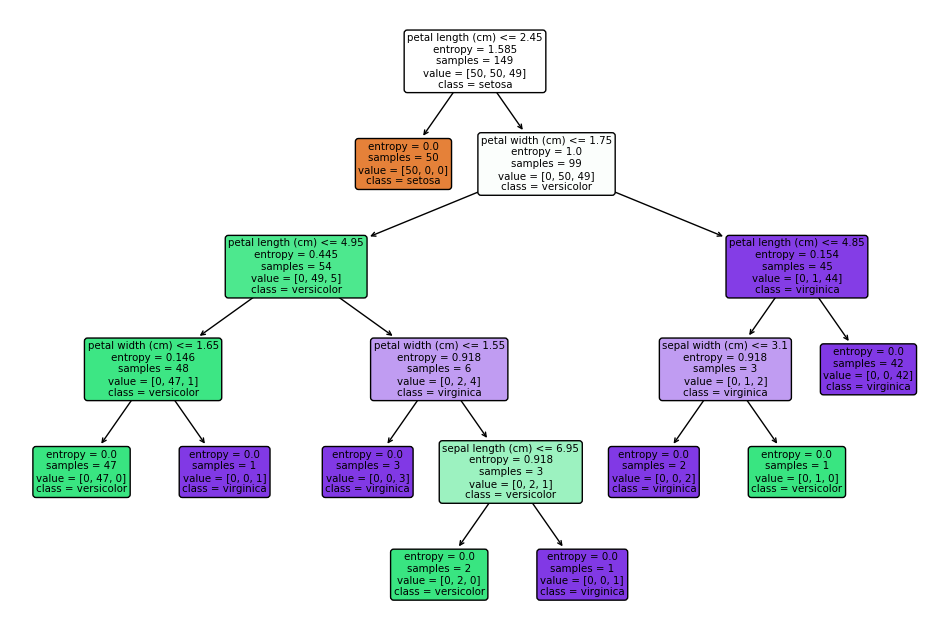

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris como ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Inicializar Leave-One-Out Cross Validator
loo = LeaveOneOut()

# Variables para almacenar los resultados
predictions = []
true_labels = []
print(type(X))
# Iterar sobre los conjuntos de entrenamiento y prueba generados por Leave-One-Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear un clasificador de árbol de decisión
    clf = DecisionTreeClassifier(criterion="entropy", random_state = 40)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = clf.predict(X_test)

    # Almacenar resultados
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calcular la precisión del modelo
accuracy = accuracy_score(true_labels, predictions)
print(f'Precisión del modelo con Leave-One-Out: {accuracy * 100:.2f}%')

# Mostrar el árbol de decisión visualmente (puedes comentar esta sección si solo te interesa la precisión)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


Precisión del modelo con Leave-One-Out: 71.43%


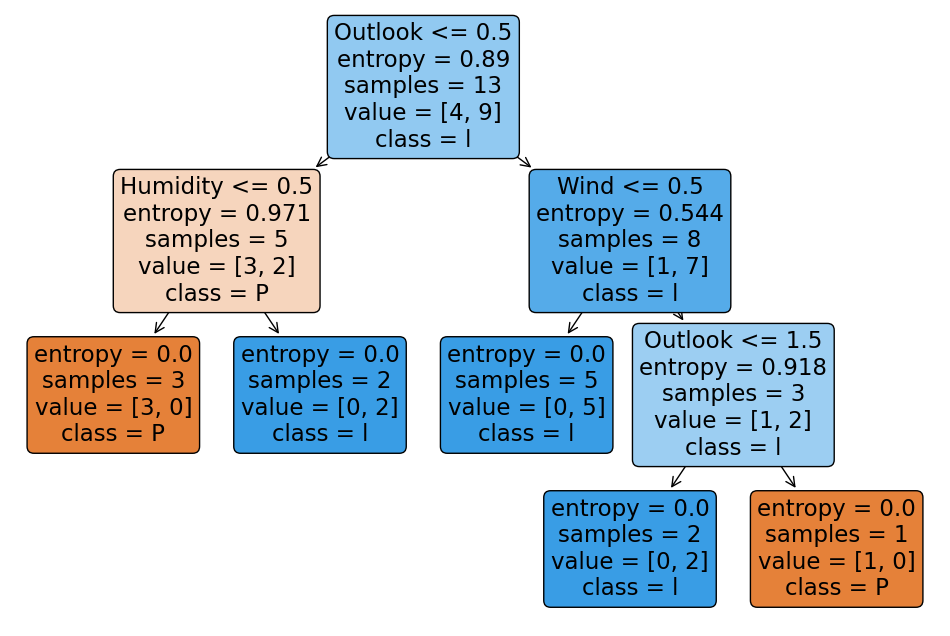

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Cargar el conjunto de datos Iris como ejemplo
tenis = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MML/PlayTennis.csv')

# Identify all categorical variables
cat_columns = tenis.select_dtypes(['object']).columns

# Convert all categorical variables to numeric and print the changed values
tenis = tenis[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Convert the dataframe to a numpy array
X = tenis.iloc[:, :-1].values
y = tenis.iloc[:, -1].values

# Inicializar Leave-One-Out Cross Validator
loo = LeaveOneOut()

# Variables para almacenar los resultados
predictions = []
true_labels = []
# Iterar sobre los conjuntos de entrenamiento y prueba generados por Leave-One-Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear un clasificador de árbol de decisión
    clf = DecisionTreeClassifier(criterion="entropy", random_state = 41)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = clf.predict(X_test)

    # Almacenar resultados
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calcular la precisión del modelo
accuracy = accuracy_score(true_labels, predictions)
print(f'Precisión del modelo con Leave-One-Out: {accuracy * 100:.2f}%')

# Mostrar el árbol de decisión visualmente (puedes comentar esta sección si solo te interesa la precisión)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=tenis.columns[:-1], class_names=tenis.columns[-1], rounded=True)
plt.show()


AssertionError: ignored